In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv("Data Breaches.csv")
dataset

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]


In [3]:
del dataset['Unnamed: 0']

In [4]:
dataset.head()

,Entity,Year,Records,Organization type,Method,Sources
0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,500px,2020,14870304,social networking,hacked,[7]
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [5]:
dataset.isnull().sum()

Entity               0
Year                 0
Records              2
Organization type    0
Method               1
Sources              2
dtype: int64

In [6]:
ent=dataset['Year'].value_counts(normalize=True)*100
ent=round(ent.iloc[0:5],2)

In [7]:
label=['2011','2020','2019','2015','2013']

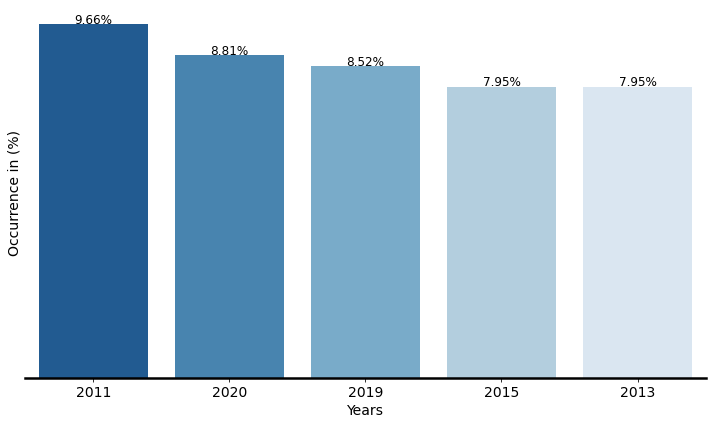

In [8]:
#figure, axes, setting the size
fig, ax = plt.subplots(figsize=(10,6))
#Bar plot
plot=sns.barplot(x=label, y=ent, palette='Blues_r',ci=False)
#bacground color
#add title
# ax.set_title("The five Years with the most occurrences of cyber attacks", fontdict={'fontsize':15})
#setting the name and size of xlabel
ax.set_xlabel('Years',fontdict={'fontsize':14})
#setting the name of ylabel
ax.set_ylabel('Occurrence in (%)', fontdict={'fontsize':14})
#setting the size of ticks
ax.tick_params(labelsize=14)
#increasing the thickness
ax.spines['bottom'].set_linewidth(2.5)
#removing axes
for axis in ['top', 'right', 'left']:
   ax.spines[axis].set_color(None)
#numbers
for i in plot.patches:
   plot.annotate(f'{i.get_height()}%',(i.get_x()+i.get_width()/2,i.get_height()),
   ha='center',va='baseline',fontsize=12,
   color='black',xytext=(0,1),
   textcoords='offset points')
#removinfg ticks
ax.tick_params(axis='y', labelleft=False, left=None)                  
#space optimize
fig.tight_layout();

In [9]:
dataset['Method'].fillna(dataset['Method'].mode()[0],inplace=True)

In [10]:
dataset.isnull().sum()

Entity               0
Year                 0
Records              2
Organization type    0
Method               0
Sources              2
dtype: int64

In [11]:
dataset1=dataset[dataset['Records']!='unknown']
dataset1

,Entity,Year,Records,Organization type,Method,Sources
0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,500px,2020,14870304,social networking,hacked,[7]
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
...,...,...,...,...,...,...
347,Zynga,2019,173000000,social network,hacked,[406][407]
348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]


In [12]:
fig=px.scatter(dataset1, x="Organization type",y='Method',color_continuous_scale='icefire')
fig.update_layout(title_text='Method used to compromise records in organizations')
fig.update_xaxes(
    showticklabels=False
)

In [13]:
dataset1[['Entity','Method']].value_counts().iloc[0:5]

Entity                              Method       
Facebook                            poor security    3
Yahoo                               hacked           2
Countrywide Financial Corp          inside job       2
Sony Pictures                       hacked           2
University of California, Berkeley  hacked           2
dtype: int64

In [14]:
#frequency
freq=dataset[['Organization type','Year']].value_counts()
freq=round(freq,2)
freq

Organization type       Year
healthcare              2011    8
                        2010    8
web                     2013    8
                        2012    7
                        2014    7
                               ..
health                  2021    1
government, military    2020    1
                        2006    1
government, healthcare  2012    1
web, tech               2013    1
Length: 184, dtype: int64

In [15]:
years_meth=dataset[['Method','Year']].value_counts(normalize=True)*100
years_meth.iloc[0:25]

Method                  Year
hacked                  2015    6.818182
                        2014    5.965909
                        2013    5.965909
                        2018    5.113636
                        2016    4.829545
                        2011    4.829545
                        2012    4.261364
                        2020    3.693182
poor security           2019    3.125000
hacked                  2019    2.840909
                        2009    1.988636
lost / stolen media     2010    1.988636
poor security           2020    1.988636
hacked                  2010    1.988636
poor security           2018    1.704545
hacked                  2021    1.704545
lost / stolen media     2011    1.420455
                        2008    1.420455
lost / stolen computer  2008    1.136364
                        2011    1.136364
lost / stolen media     2009    1.136364
inside job              2007    1.136364
accidentally published  2011    1.136364
                        2012